In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn import preprocessing

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn import svm

In [27]:
print("hello")


hello


In [4]:
!pip list


Package                       Version
----------------------------- --------------------
absl-py                       1.3.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcr

In [8]:
# on télécharge le dataframe et on le lit 

df =pd.read_csv("datasetP.csv")

df

,Unnamed: 0,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,1,90,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Female,0,4356,40,<=50K
1,2,82,5.0,HS-grad,Widowed,5.0,Not-in-family,White,Female,0,4356,18,<=50K
2,3,66,NaN,Some-college,Widowed,NaN,Unmarried,Black,Female,0,4356,40,<=50K
3,4,54,5.0,7th-8th,Divorced,8.0,Unmarried,White,Female,0,3900,40,<=50K
4,5,41,5.0,Some-college,Separated,11.0,Own-child,White,Female,0,3900,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32557,22,5.0,Some-college,Never-married,12.0,Not-in-family,White,Male,0,0,40,<=50K
32557,32558,27,5.0,Assoc-acdm,Married-civ-spouse,14.0,Wife,White,Female,0,0,38,<=50K
32558,32559,40,5.0,HS-grad,Married-civ-spouse,8.0,Husband,White,Male,0,0,40,>50K
32559,32560,58,5.0,HS-grad,Widowed,2.0,Unmarried,White,Female,0,0,40,<=50K


In [14]:
#on récupère les informations sur les colonnes et leur types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      32561 non-null  int64  
 1   age             32561 non-null  int64  
 2   workclass       30725 non-null  float64
 3   education       32561 non-null  object 
 4   marital.status  32561 non-null  object 
 5   occupation      30718 non-null  float64
 6   relationship    32561 non-null  object 
 7   race            32561 non-null  object 
 8   sex             32561 non-null  object 
 9   capital.gain    32561 non-null  int64  
 10  capital.loss    32561 non-null  int64  
 11  hours.per.week  32561 non-null  int64  
 12  income          32561 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 3.2+ MB


In [15]:
#on affiche les types des variables à traiter.

df.dtypes

Unnamed: 0          int64
age                 int64
workclass         float64
education          object
marital.status     object
occupation        float64
relationship       object
race               object
sex                object
capital.gain        int64
capital.loss        int64
hours.per.week      int64
income             object
dtype: object

In [16]:
# on affiche le shape des variables.

df.shape

(32561, 13)

In [17]:
#on affiche les valeurs non nulles on les traitera par la suite dans ce notebook

df.isna().sum()

Unnamed: 0           0
age                  0
workclass         1836
education            0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
income               0
dtype: int64

In [19]:
# on affiche la répartition de la variable sex

df.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [41]:
#on crée un jeu de donnée où on met le pct et le count de la variable sexe

sex_count = df['sex'].value_counts()
sex_pct= sex_count / len(df.index)

sex = pd.concat([sex_count, round(sex_pct,2)], axis=1)\
        .set_axis(['count', 'pct'], axis=1, inplace=False)
sex

/var/folders/r1/jtkyl1qn21d0wmtky3gjgzz80000gn/T/ipykernel_44269/1321544473.py:4: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  sex = pd.concat([sex_count, round(sex_pct,2)], axis=1)\


,count,pct
Male,21790,0.67
Female,10771,0.33


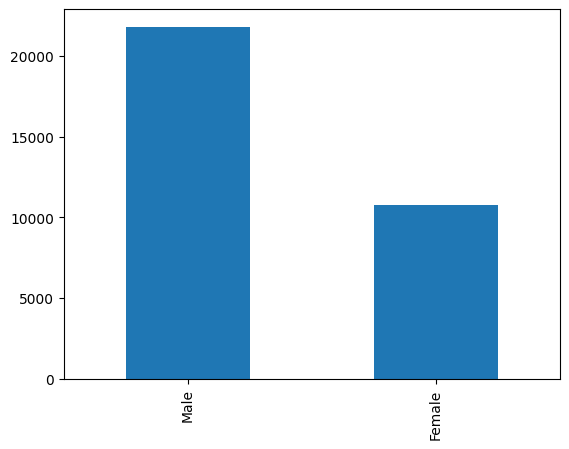

In [38]:
#on visualise le count de la colonne sex

df['sex'].value_counts().plot(kind='bar')

<AxesSubplot: >

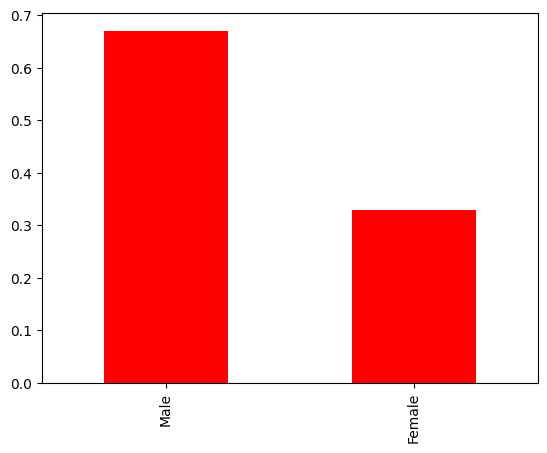

In [44]:
# on visualise le pct

sex.pct.plot(kind="bar", color="red")

In [70]:
# on procède au même traitement pour income

df.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [71]:
income_count = df['income'].value_counts()
income_pct= income_count / len(df.index)

income = pd.concat([income_count, round(income_pct,2)], axis=1)\
        .set_axis(['count', 'pct'], axis=1, inplace=False)
income

/var/folders/r1/jtkyl1qn21d0wmtky3gjgzz80000gn/T/ipykernel_44269/1068997859.py:4: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  income = pd.concat([income_count, round(income_pct,2)], axis=1)\


,count,pct
<=50K,24720,0.76
>50K,7841,0.24


<AxesSubplot: >

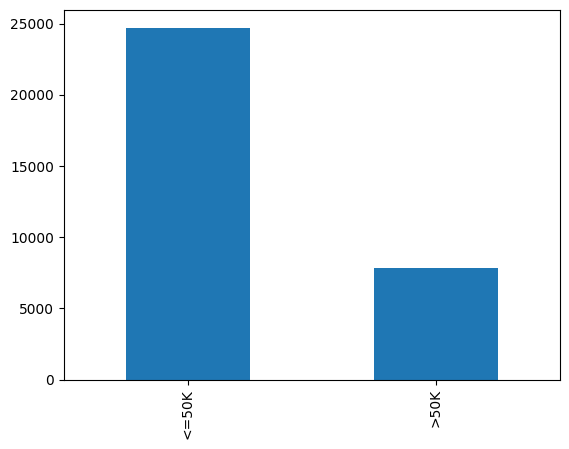

In [72]:
df['income'].value_counts().plot(kind='bar')

<AxesSubplot: >

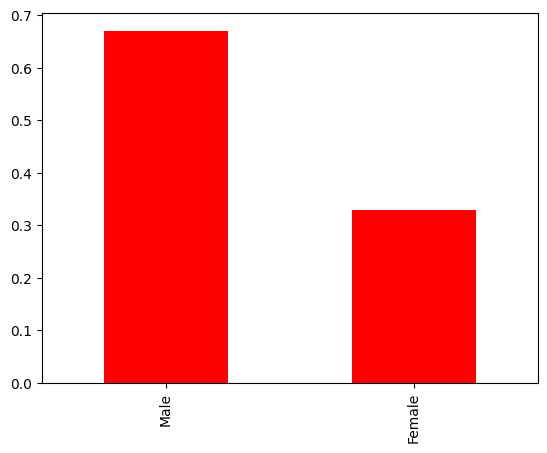

In [73]:
sex.pct.plot(kind="bar", color="red")

In [76]:
# on s'intéresse aux variables qualitatives.

df.age.info()
df.age.describe()

<class 'pandas.core.series.Series'>
RangeIndex: 32561 entries, 0 to 32560
Series name: age
Non-Null Count  Dtype
--------------  -----
32561 non-null  int64
dtypes: int64(1)
memory usage: 254.5 KB


count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [77]:
df["capital.loss"].info()
df["capital.loss"].describe()

<class 'pandas.core.series.Series'>
RangeIndex: 32561 entries, 0 to 32560
Series name: capital.loss
Non-Null Count  Dtype
--------------  -----
32561 non-null  int64
dtypes: int64(1)
memory usage: 254.5 KB


count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital.loss, dtype: float64

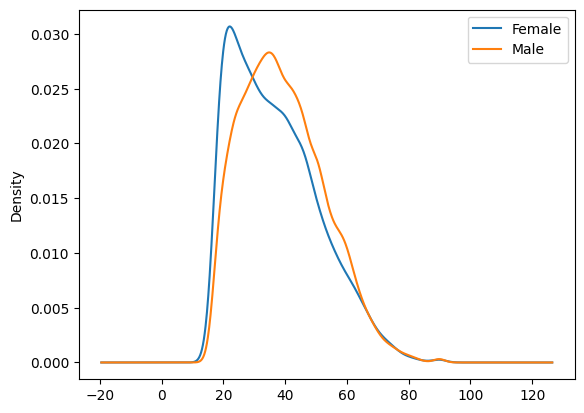

In [67]:
#on regarde l'évolution de l'age des femmes et on la compare à celle des hommes.

df.groupby('sex').age.plot(kind='kde')
plt.legend()

<AxesSubplot: xlabel='sex', ylabel='count'>

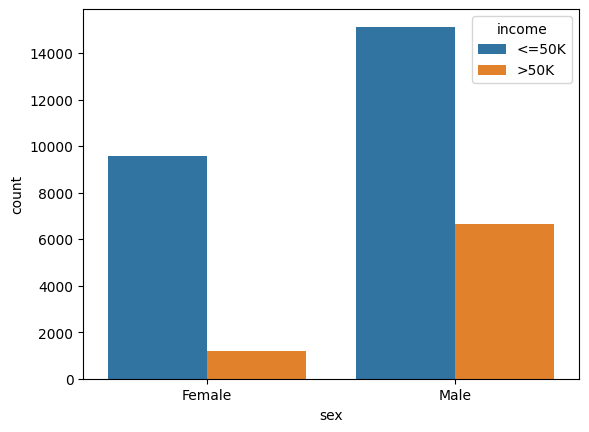

In [69]:
#on regarde l'évolution des incomes des femmes et on la compare à celui des hommes.

# on remarque que les hommes touchent en général plus que les femmes en nombre et en pct  

sns.countplot(x='sex', hue = 'income',data = df)



In [109]:
# on va calculer le nombre de lignes dupliqués dans le dataset je propose de manières de le faire



print(df.shape)

df=df.drop_duplicates()
print(df.shape)


val = len(df)-len(df.drop_duplicates())

print("le nombre de lignes dupliqués est", val)


new_df = df.groupby(df.columns.tolist()).size().reset_index().\
    rename(columns={0:'records'})

new_df.records.describe()

#on remarque qu'on a 0 doublon

(32561, 13)
(32561, 13)
le nombre de lignes dupliqués est 0


count    30718.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: records, dtype: float64

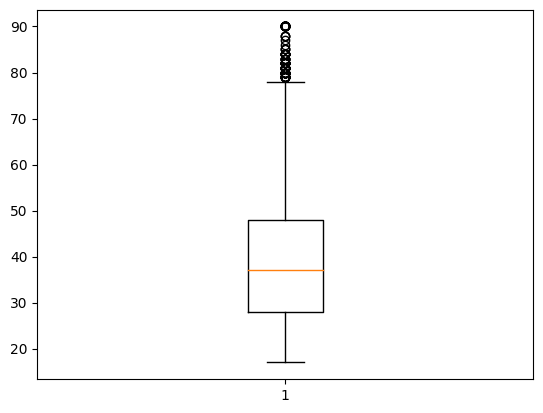

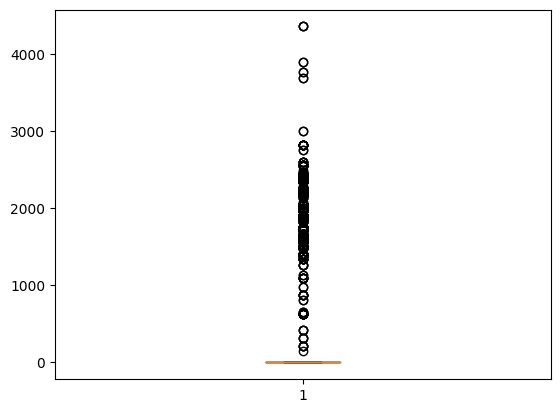

In [117]:

plt.boxplot(df.age)
plt.show()

plt.boxplot(df["capital.loss"])
plt.show()

In [118]:
# en se basant sur les résultats du box_plot, on peut dire que toutes les personnes agées au dessus de 80 ans
#  et toutes les personnes ayant un capital.loss >0 représentent des outliers

In [128]:
df_out_age=df[df["age"]>=80]
len(df_out_age)
print(len(df_out_age)/len(df))

0.00371610208531679


In [127]:
df_out_loss=df[df["capital.loss"]>80]
len(df_out_loss)
print(len(df_out_loss)/len(df))


0.0466509013850926


In [129]:
# on peut conclure que le nombre de valuers abérantes reste acceptable on peut les supprimer, je décide
#de ne pas les supprimer car je trouve que ses valeurs sont importantes et il est intéressant de voir 
#ce qu'ils vont donner par la suite



<AxesSubplot: xlabel='age', ylabel='count'>

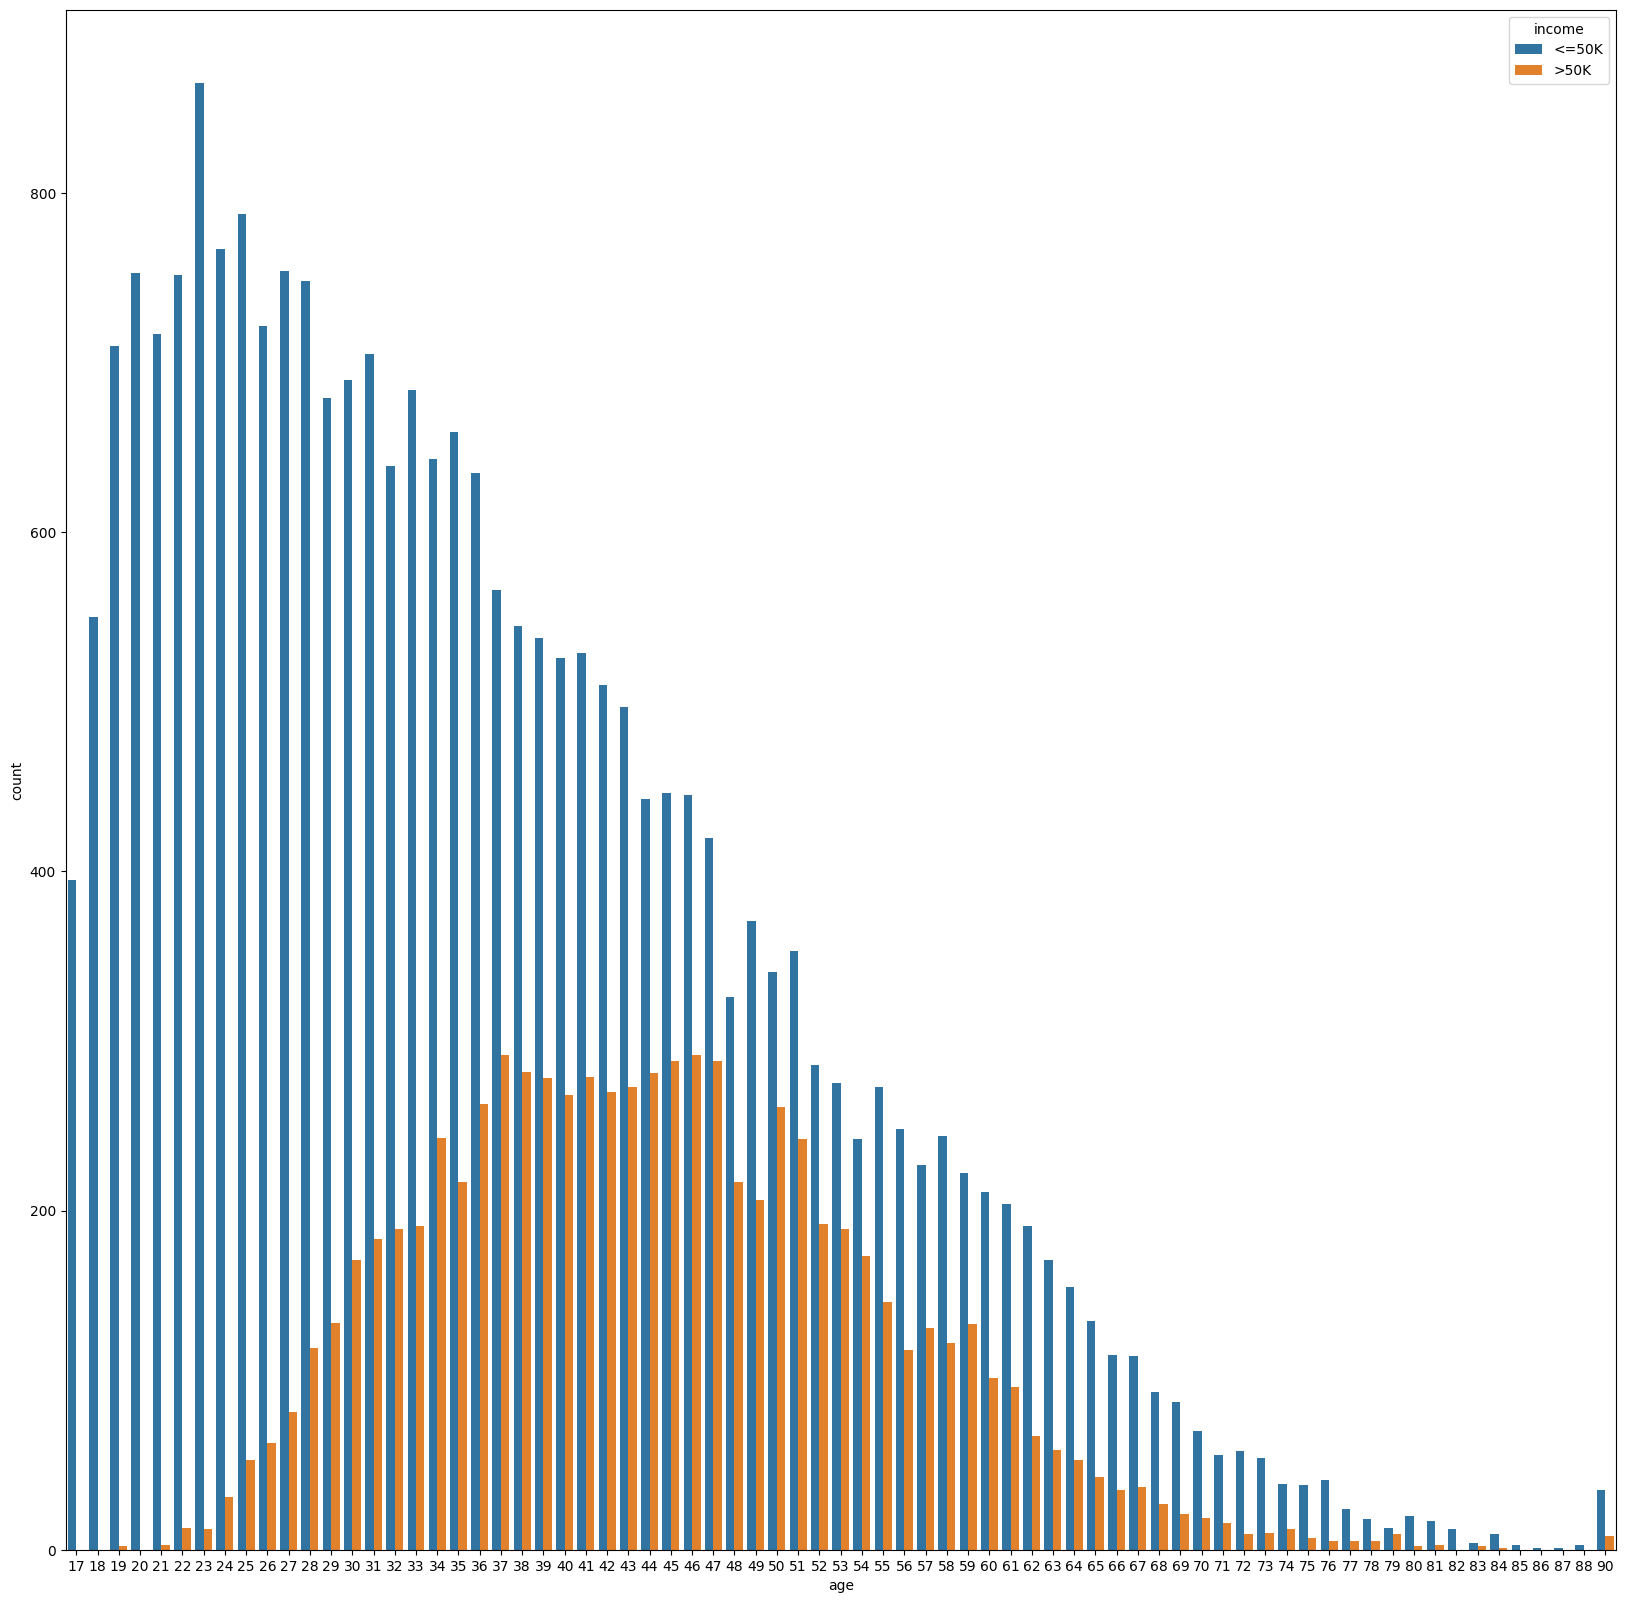

In [135]:
plt.figure(figsize=(20,20))

sns.countplot(x='age', hue = 'income',data = df)

#on remarque que les gens gagnet mieux leur vie entre 30 et 60 ans 


In [144]:
#on calcule maitenant les moyenns de l'age selon chaque catégorie

df_1=df[df["income"]=="<=50K"]

print(df_1.shape)
df_2=df[df["income"]==">50K"]
print(df_2.shape)

print("la moyenne d'age pour les personnes qui touchent moins de 50K est:", df_1["age"].mean())

print("la moyenne d'age pour les personnes qui touchent plus de 50K est:", df_2["age"].mean())

#les moyennes confirme nos observations

(24720, 13)
(7841, 13)
la moyenne d'age pour les personnes qui touchent moins de 50K est: 36.78373786407767
la moyenne d'age pour les personnes qui touchent plus de 50K est: 44.24984058155847


0        NaN
1        5.0
2        NaN
3        5.0
4        5.0
        ... 
32556    5.0
32557    5.0
32558    5.0
32559    5.0
32560    5.0
Name: workclass, Length: 32561, dtype: float64
5.0    22696
7.0     2541
3.0     2093
8.0     1298
6.0     1116
2.0      960
9.0       14
4.0        7
Name: workclass, dtype: int64
5.1000813669650125


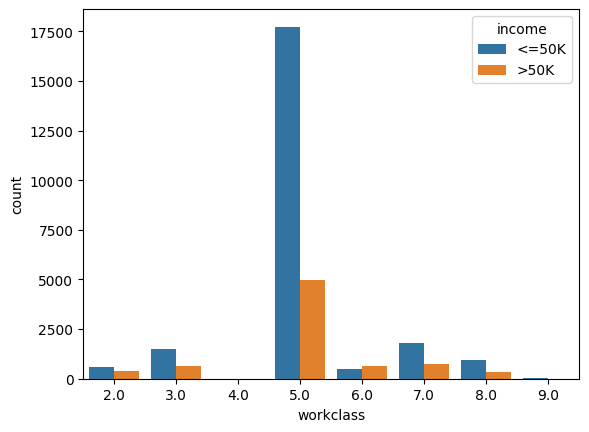

In [156]:
# on s'intéresse aux valeurs nulles
df.isna().sum()

print(df["workclass"])

print(df.workclass.value_counts())
print(df.workclass.mean())

#on affiche pour voir si on peut trouver une relation entre l'income et la workclass pour
#remplacer les valeurs nulles

# ce n'est pas le cas on remplacera donc les valeurs manquantes par 5

sns.countplot(x='workclass', hue = 'income',data = df)
plt.show()



In [158]:
df["workclass"] = df["workclass"].fillna(5)

df.isna().sum()

#on s'intéresse maintenant à occupation 

Unnamed: 0           0
age                  0
workclass            0
education            0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
income               0
dtype: int64

0         NaN
1         5.0
2         NaN
3         8.0
4        11.0
         ... 
32556    12.0
32557    14.0
32558     8.0
32559     2.0
32560     2.0
Name: occupation, Length: 32561, dtype: float64
11.0    4140
4.0     4099
5.0     4066
2.0     3770
13.0    3650
9.0     3295
8.0     2002
15.0    1597
7.0     1370
6.0      994
14.0     928
12.0     649
10.0     149
3.0        9
Name: occupation, dtype: int64
7.967087701022202


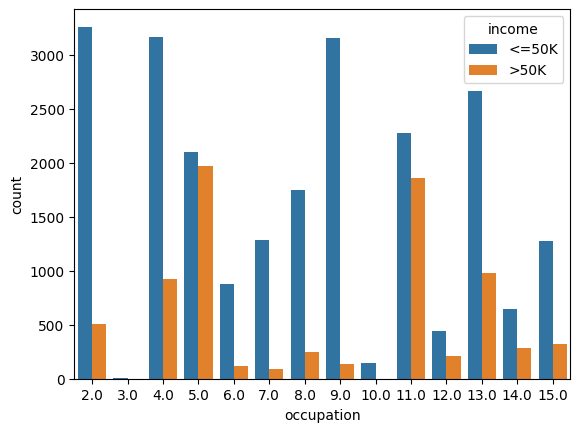

In [160]:
print(df["occupation"])

print(df.occupation.value_counts())
print(df.occupation.mean())

sns.countplot(x='occupation', hue = 'income',data = df)
plt.show()

# here there is clearly a relationship between income and occupation but it will not be enough to give each income 
# an occupation so we will proceed by replacing all missing values with average

In [164]:
df["occupation"] = df["occupation"].fillna(8)

df.isna().sum()
#plus de valeurs manquantes

Unnamed: 0        0
age               0
workclass         0
education         0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
income            0
dtype: int64

['Female' 'Male']
[0 0 0 ... 1 0 1]
['<=50K' '>50K']
[0 0 0 ... 1 0 0]
0.21598015058403602 0.0


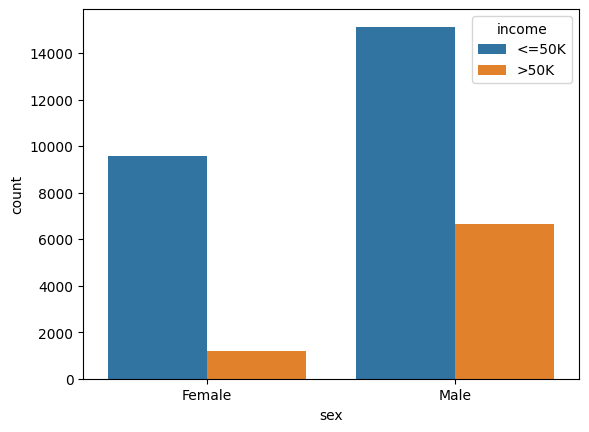

In [185]:
#partie C

#on commence par visualiser les relations entre les données
sns.countplot(x='sex', hue = 'income',data = df)

#il est clair qu'il y a une relation entre income et le sex on s'assure cependant en effectuant le test de Pearson
#il faut effectuer de label encoding avant de procéder aux tests


le = preprocessing.LabelEncoder()

le.fit(df.sex)
res_sex =le.transform(df.sex)

print(le.classes_)
print(res_sex)

le.fit(df.income)
res_income =le.transform(df.income)

print(le.classes_)
print(res_income)

coef_cor, pvalue = pearsonr(res_sex, res_income)
print(coef_cor, pvalue)

#according to the pvalue there is a weak correlation between the two variables.

<AxesSubplot: xlabel='age', ylabel='count'>

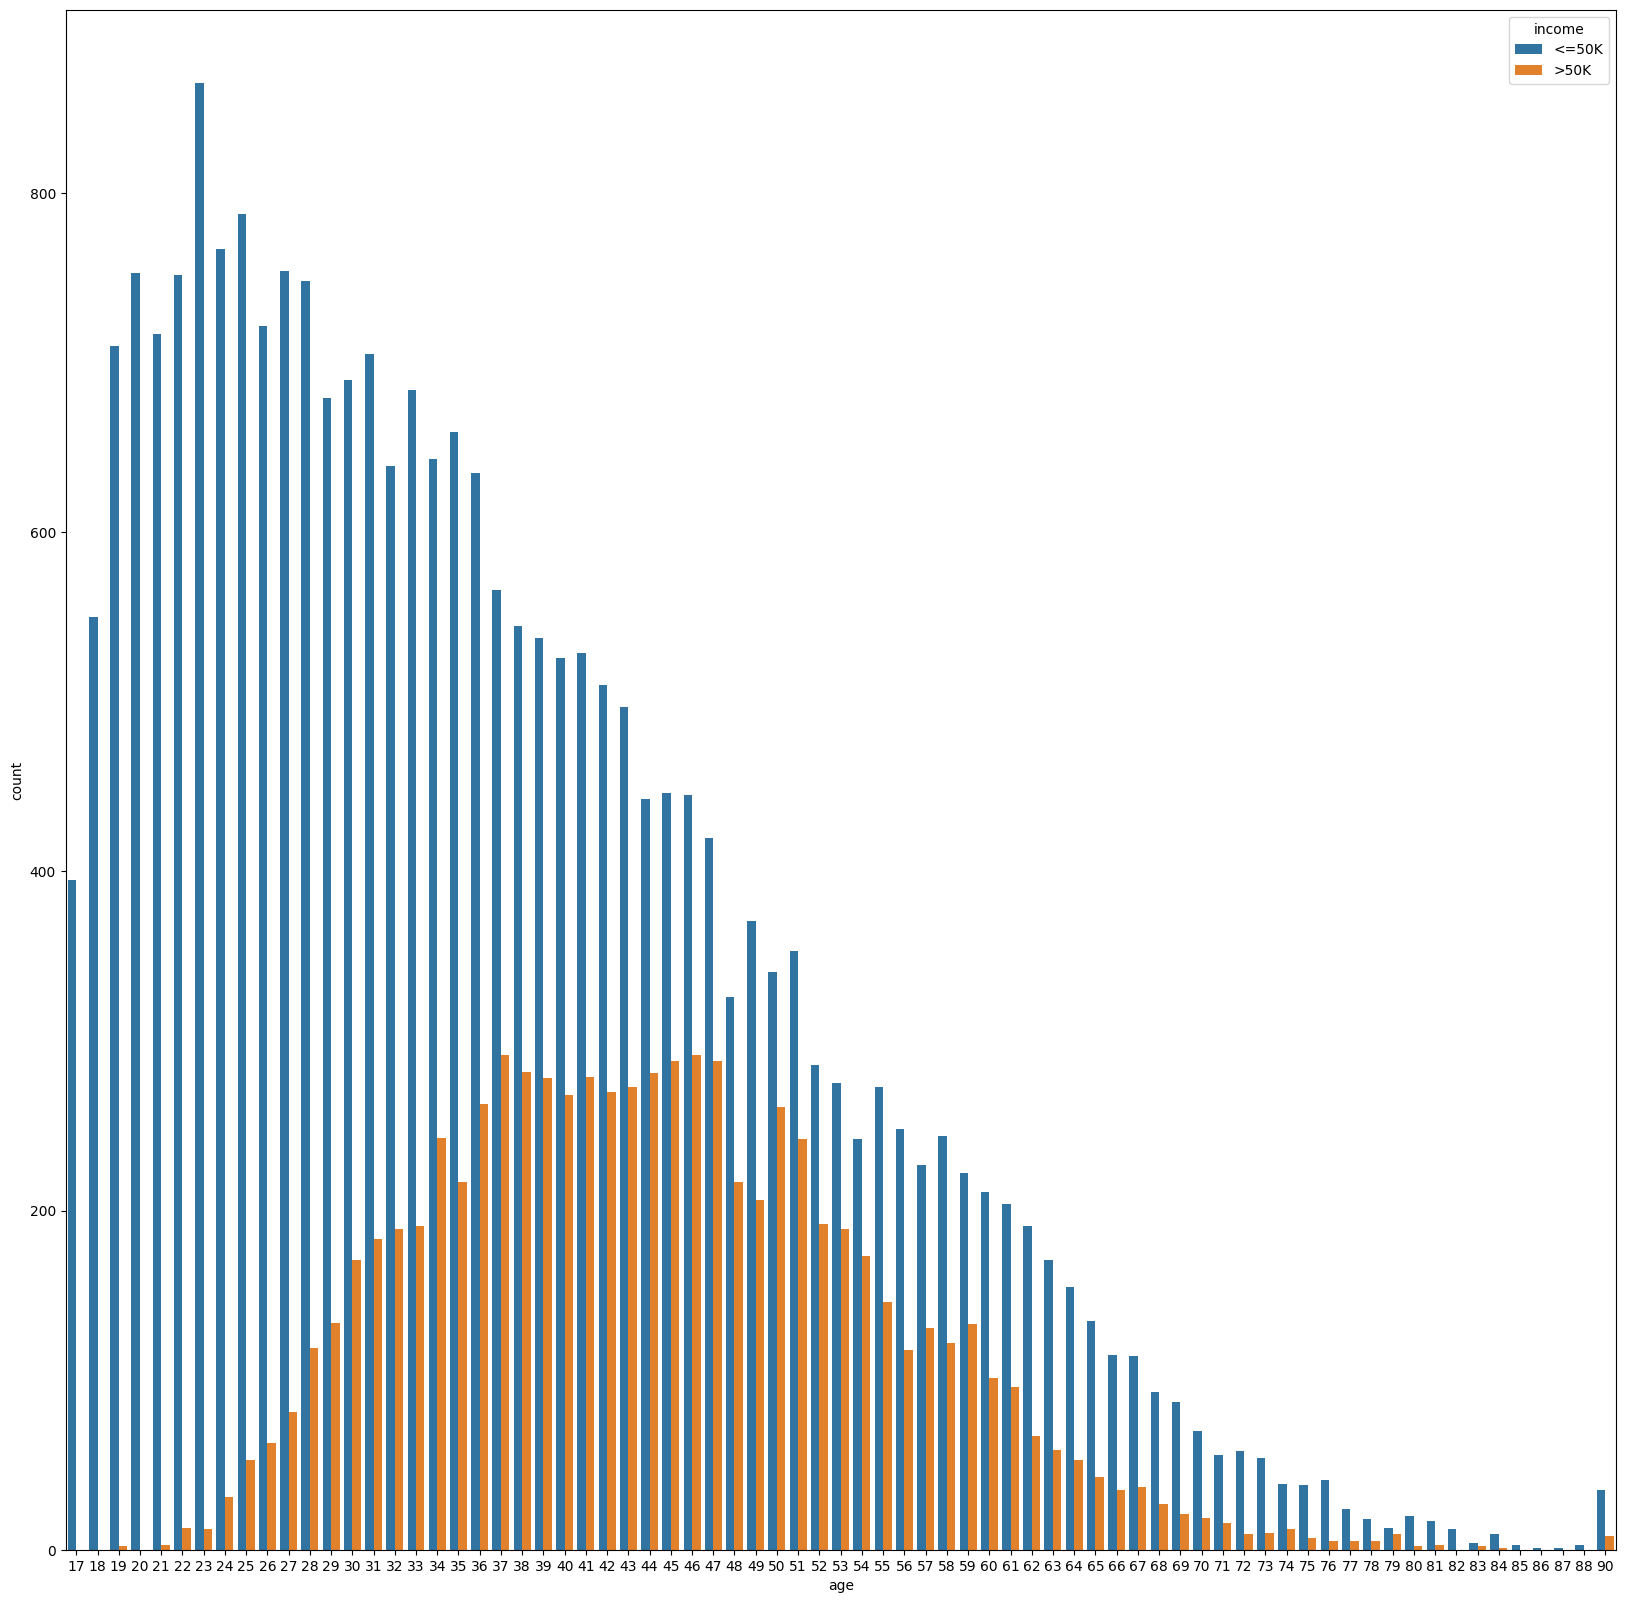

In [186]:
# correlation age et income

plt.figure(figsize=(20,20))

sns.countplot(x='age', hue = 'income',data = df)

#visuellement il y clairement une correlation entre age et income cependant elle n'est pas linéaire, on verra 
#si pearson sera en mesure de la détecter


In [188]:

coef_cor, pvalue = pearsonr(df.age, res_income)
print(coef_cor, pvalue)

#on réussi à la détecter mais elle est faible.

0.23403710264885766 0.0


<AxesSubplot: xlabel='age', ylabel='count'>

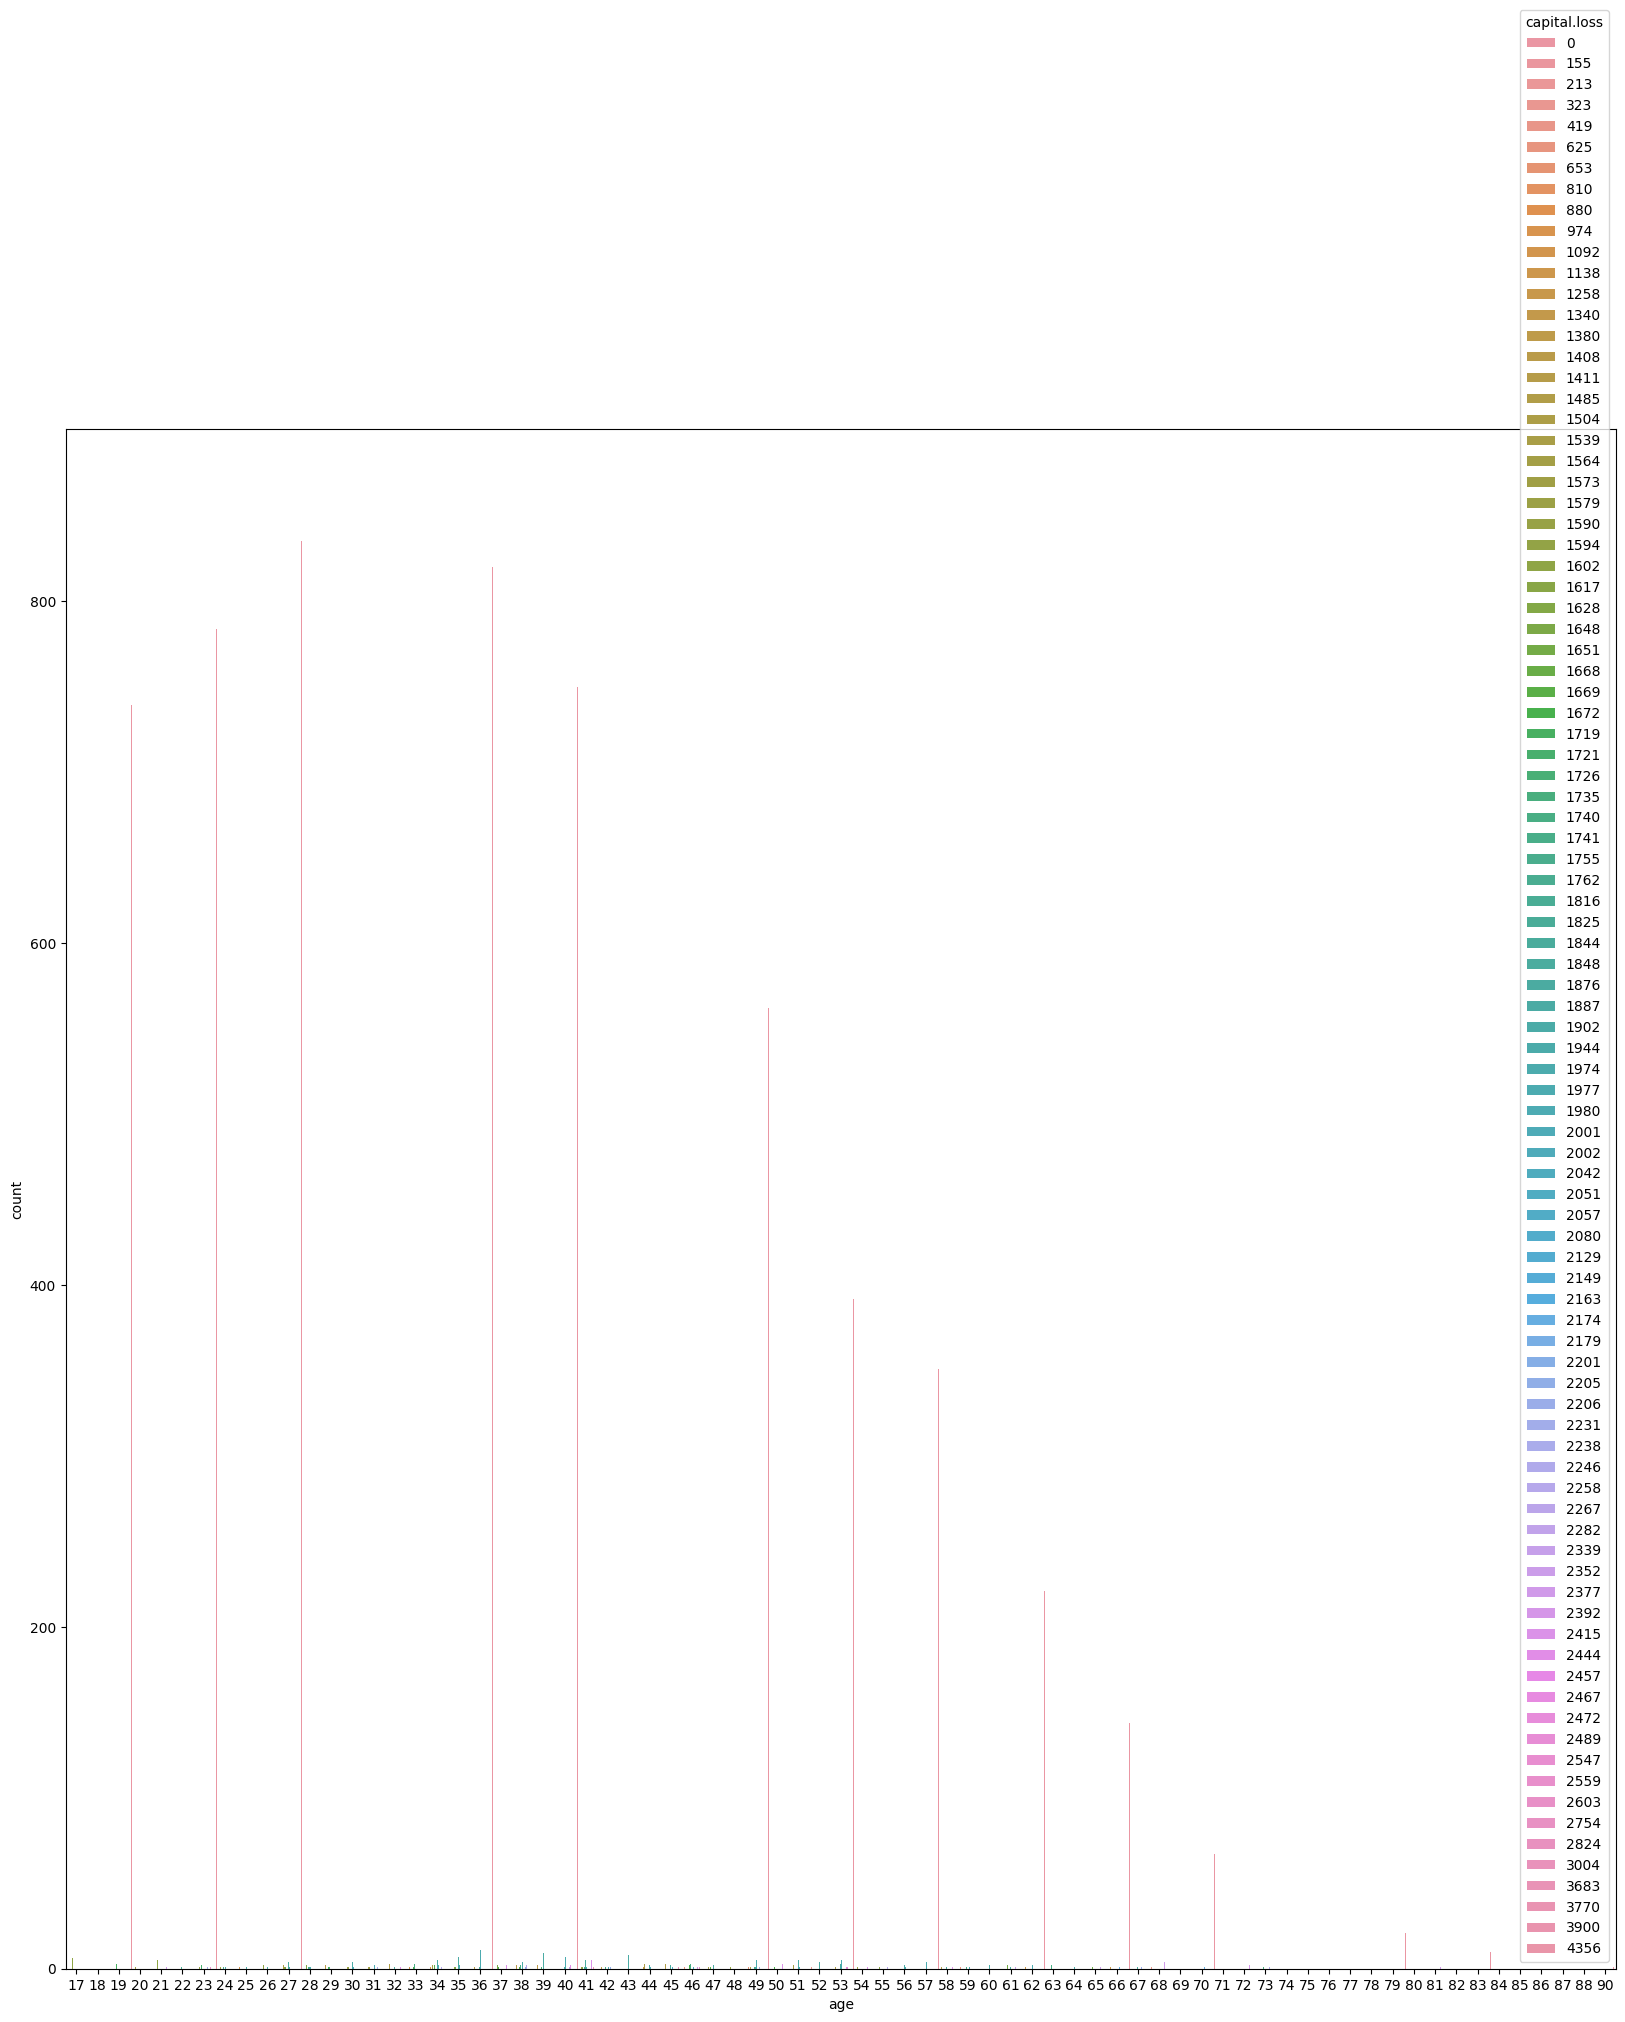

In [191]:
plt.figure(figsize=(20,20))

sns.countplot(x='age', hue = 'capital.loss' ,data = df)

In [193]:
#corrélation entre age et capital.loss

coef_cor, pvalue = pearsonr(df.age, df["capital.loss"])
print(coef_cor, pvalue)

#pas de corrélation car même si à première vue on peut détecter une petite corrélation il faut savoir
#que la majorité des valeurs de income.loss sont nulles.

print(df["capital.loss"].value_counts())


0.05777453947897483 1.7427585118290728e-25
0       31042
1902      202
1977      168
1887      159
1485       51
        ...  
2201        1
2163        1
1944        1
1539        1
2472        1
Name: capital.loss, Length: 92, dtype: int64


In [221]:
#D

#1 on utilisera le PCA(), il faut d'abord utiliser label encoding 
#ou one hot encoder pour toutes les variables non numériques

from sklearn.pipeline import Pipeline

print(df.dtypes)
#education
le.fit(df.education)
res_education =le.transform(df.education)

print(le.classes_)
print(res_education)

#marital.status
le.fit(df["marital.status"])
res_marital =le.transform(df["marital.status"])

print(le.classes_)
print(res_marital)

#relationship

le.fit(df.relationship)
res_relationship =le.transform(df.relationship)

print(le.classes_)
print(res_relationship)


#race
le.fit(df.race)
res_race =le.transform(df.race)

print(le.classes_)
print(res_race)


df_pca=df

df_pca["education"]=res_education
df_pca["marital.status"]=res_marital
df_pca["relationship"]=res_relationship
df_pca["race"]=res_race
df_pca["sex"]=res_sex
df_pca["income"]=res_income

df_pca.drop(columns="income")

df_array_ = df_pca.values


# Création d'une instance de la classe PCA
pipe_ = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA())])

pipe_
#pipe_.fit(df.values)
# Application du modèle aux données (Entrainement du modèle par les données et transformation des données par le modèle)
#df_acp = model_acp.fit_transform(df)
#df_acp

Unnamed: 0          int64
age                 int64
workclass         float64
education           int64
marital.status      int64
occupation        float64
relationship        int64
race                int64
sex                 int64
capital.gain        int64
capital.loss        int64
hours.per.week      int64
income              int64
dtype: object
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[11 11 15 ... 11 11 11]
[0 1 2 3 4 5 6]
[6 6 6 ... 2 6 4]
[0 1 2 3 4 5]
[1 1 4 ... 0 4 3]
[0 1 2 3 4]
[4 4 2 ... 4 4 4]


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

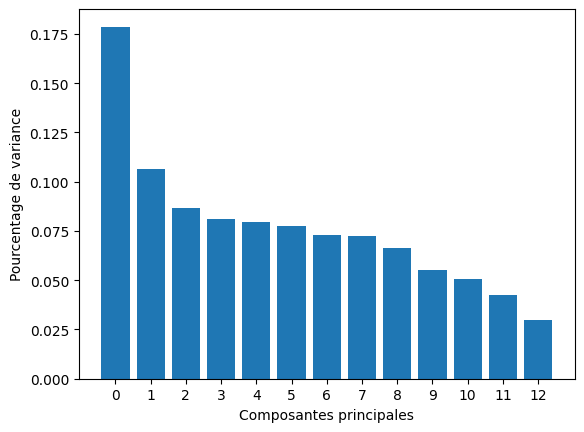

In [222]:
# Application de l'objet pipe aux données
pipe_.fit(df_array_)

# Visualisation du pourcentage de variance expliquée par chaque composante
plt.bar(range(pipe_[1].n_components_), pipe_[1].explained_variance_ratio_)
plt.xlabel('Composantes principales')
plt.ylabel('Pourcentage de variance')
plt.xticks(range(pipe_[1].n_components_))
plt.show()

In [262]:
try_df=df.drop(columns="income")

print(df.dtypes)

x_train, x_test, y_train, y_test= train_test_split( try_df.values, df.income, test_size=0.25)

Unnamed: 0          int64
age                 int64
workclass         float64
education           int64
marital.status      int64
occupation        float64
relationship        int64
race                int64
sex                 int64
capital.gain        int64
capital.loss        int64
hours.per.week      int64
income              int64
dtype: object


In [263]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
print(neigh.score(x_test,y_test))

neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(x_train, y_train)
print(neigh.score(x_test,y_test))

#suite à l'optimisation on obtient de meilleurs résultats est

0.7823363223191254
0.8281537894607542


In [264]:
clf=svm.SVC()

clf.fit(x_train,y_train)

print(clf.score(x_test,y_test))

0.8044466281783564


In [265]:
from sklearn import tree
tr= tree.DecisionTreeClassifier()
tr.fit(x_train, y_train)
print(tr.score(x_test,y_test))


0.8131679154894976


In [266]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(random_state=0).fit(x_train, y_train)

print(reg.score(x_test,y_test))

#on remarque qu'en général les résultats sont très semblables et que le meilleur modèle après le tuning est
#le KNN

0.8039552880481513


/Users/drisslalami/opt/anaconda3/envs/jupyter_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [267]:
# on peut penser à plusieurs techniques pour améliorer les résultats augmenter nos jeux de donnés,
#utiliser le k-fold, utiliser un jeu de validation, augmenter le jeu d'entrainemenet par rapport à celui du test


In [ ]:
# avec le K-nn et tous les autres modèles de classification on peut traiter plusieurs jeux de données et appliquer 
# la classificatio notamment pour la prédiction des averses de pluies ou non, les accidents ou pas ...

In [ ]:
#Non , on peut inclure le genre dans nos données parce qu'il ne permet pas de distinguer une personne et donc 
#ceci est conforme avec les lois de RGPD.